# Setup

## Install dependencies

In [ ]:
!pip install opencv-python
!pip install pycocotools
!pip install ipykernel
!pip install scipy
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install networkx==2.6.2
# !pip install torch==1.6.0 torchvision==0.7.0
!pip install open3d

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
from os.path import exists, join, basename, splitext
import open3d as o3d 

In [2]:
!python --version

Python 3.7.12


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
!nvidia-smi 

Thu Feb 10 10:40:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Clone M3D-VTON repo and download pretrained models

In [5]:
!git clone https://github.com/fyviezhao/m3d-vton

fatal: destination path 'm3d-vton' already exists and is not an empty directory.


In [6]:
cd m3d-vton/pretrained

/content/m3d-vton/pretrained


In [7]:
!gdown https://drive.google.com/uc?id=1wpN-yfa1_MbezqkcLfVspa2jVTJV7bjN

Downloading...
From: https://drive.google.com/uc?id=1wpN-yfa1_MbezqkcLfVspa2jVTJV7bjN
To: /content/m3d-vton/pretrained/M3D-VTON.zip
100% 513M/513M [00:05<00:00, 99.1MB/s]


In [8]:
!unzip -o M3D-VTON.zip 
!rm M3D-VTON.zip

Archive:  M3D-VTON.zip
 extracting: latest_net_TFM.pth      
 extracting: latest_net_MTM.pth      
 extracting: latest_net_DRM.pth      
 extracting: readme.txt              


In [9]:
!mv latest_net_DRM.pth ./aligned/DRM/
!mv latest_net_MTM.pth ./aligned/MTM/
!mv latest_net_TFM.pth ./aligned/TFM/

In [10]:
cd ..

/content/m3d-vton


In [11]:
cd ..

/content


# Clone 2D Human Parsing Repo and download pretrained model

In [12]:
!git clone https://github.com/fyviezhao/2D-Human-Parsing

fatal: destination path '2D-Human-Parsing' already exists and is not an empty directory.


In [13]:
cd 2D-Human-Parsing/pretrained

/content/2D-Human-Parsing/pretrained


In [14]:
!gdown https://drive.google.com/uc?id=1cTYhbKbtrPfREVI_EkredmIq5WaT5GY6

Downloading...
From: https://drive.google.com/uc?id=1cTYhbKbtrPfREVI_EkredmIq5WaT5GY6
To: /content/2D-Human-Parsing/pretrained/deeplabv3plus-xception-vocNov14_20-51-38_epoch-89.pth
100% 167M/167M [00:01<00:00, 152MB/s]


In [15]:
cd ..

/content/2D-Human-Parsing


In [16]:
cd ..

/content


## Build Open Pose

In [17]:
git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

Selecting previously unselected package libgflags2.2.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

# Input setup (Upload input_data)

Upload the input_data folder with the following:
- cloth (contains the image of the cloth)
- cloth-mask
- image (contains the image of the person)
- image-parse
- pose
- train_pairs.txt
- test_paris.txt

The cloth file image should be named as follows: cloth@1=cloth_front.jpg

The image file image should be named as follows: person@1=person_whole_front.png

In [18]:
cd /content/m3d-vton

/content/m3d-vton


In [19]:
from google.colab import files
files.upload()

Saving input_data.zip to input_data.zip


{'input_data.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xc1\x01IT\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00input_data/cloth/PK\x03\x04\x14\x00\x00\x00\x08\x00\xe7\x90ET\x9a\xb03\xb9\x00\x1e\x00\x00\xe6\x1e\x00\x00(\x00\x00\x00input_data/cloth/cloth@1=cloth_front.jpg\xa5xuT\x1c\xcf\xb6n\x0f\x83\x07gpw\x18$\xb8\x06\x87\x00\x83{ \x86\xbb\r\xc1]\x83\x06\x1d\xdc5\x0c\x0e\x01\x12\x08\x90\x04\t\xee\x12\x9c\xe0\x10\x82\x07\xb7K\xce\xef\xbc{\xcfzo\xad\xfb\xcf\xdb\xdd\xab\xd7\xaa\xda\xd5\xbb\xf7\xfe\xaa\xf6W\xbd\xeb~\xe6\xfe\'@\x00{\xaa\xf2\x14\x00\x81\x00\x00\xf4p\x01\xf7w\x00\x9d\xbc\xb3\xa3\x8b\xab\xe5\x9b7\x96\x16\xf4f\xde\xf4v.\x96\xd6\xdc\xae\x96\xe6\xff\xee\xbc\x9f\x07\xc2\x00\xd4\xff\x16tt4ttL\x8c\x07\xc1\xc4\xc1\xfa+8\xc48x8\x0f71!\x84\x00\x9f\x00BHKFBBF\xcbHCE\xc3\x08ea\x81\n\xf2\x0b*(\xbc\x00\xfd\xff\x1a\xb8\xef\x00\x081Q\x00\x90\x0c\x18\xc4\x08\xa0\x10\x82\xc0\x84\xa0\xfb.\x80\xfao\x1c(\xe0\xbf\xc1\xfc\x1fA\x01c\x80P\xd1\xd10\xef\xe7\x00\xcc\x7f\xfaoo\x80\xff]\x

In [20]:
!unzip input_data.zip
!rm input_data.zip

Archive:  input_data.zip
   creating: input_data/cloth/
  inflating: input_data/cloth/cloth@1=cloth_front.jpg  
   creating: input_data/cloth-mask/
  inflating: input_data/cloth-mask/cloth@1=cloth_front_mask.jpg  
   creating: input_data/image/
  inflating: input_data/image/person@1=person_whole_front.png  
   creating: input_data/image-parse/
  inflating: input_data/image-parse/person@1=person_whole_front_label.png  
   creating: input_data/pose/
  inflating: input_data/pose/person@1=person_whole_front_keypoints.json  
  inflating: input_data/test_pairs.txt  
  inflating: input_data/train_pairs.txt  


## Creating cloth mask

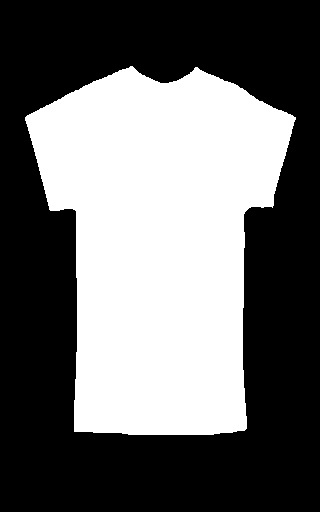

True

In [21]:
img = cv2.imread('/content/m3d-vton/input_data/cloth/cloth@1=cloth_front.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img,200, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)
cv2.imwrite('/content/m3d-vton/input_data/cloth-mask/cloth@1=cloth_front_mask.jpg', thresh)

In [23]:
cd ..

/content


## Creating image parse

In [25]:
cd 2D-Human-Parsing/inference

/content/2D-Human-Parsing/inference


In [26]:
!cp -r '/content/m3d-vton/input_data/image/person@1=person_whole_front.png' '/content/2D-Human-Parsing/demo_imgs'

### Edit img_list.txt

/content/2D-Human-Parsing/demo_imgs/person@1=person_whole_front.png

In [27]:
with open('/content/2D-Human-Parsing/inference/img_list.txt', 'w') as f:
  f.write('/content/2D-Human-Parsing/demo_imgs/person@1=person_whole_front.png')

with open('/content/2D-Human-Parsing/demo_imgs/img_list.txt', 'w') as f:
  f.write('/content/2D-Human-Parsing/demo_imgs/person@1=person_whole_front.png')

## Edit demo.sh


CUDA_VISIBLE_DEVICES=0 \
python inference_acc.py \
--loadmodel '../pretrained/deeplabv3plus-xception-vocNov14_20-51-38_epoch-89.pth' \
--img_list '../demo_imgs/img_list.txt' \
--output_dir '../parsing_result'

In [28]:
!bash demo.sh

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
missing keys in state_dict: "{'xception_features.block11.rep.5.pointwise_bn.num_batches_tracked', 'aspp2.atrous_convolution.pointwise_bn.num_batches_tracked', 'aspp4.atrous_convolution.pointwise_bn.num_batches_tracked', 'decoder.0.atrous_convolution.depthwise_bn.num_batches_tracked', 'xception_features.block4.rep.1.depthwise_bn.num_batches_tracked', 'xception_features.block15.rep.1.pointwise_bn.num_batches_tracked', 'xception_features.block17.rep.1.depthwise_bn.num_batches_tracked', 'xception_features.block13.rep.3.pointwise_bn.num_batches_tracked', 'decoder.1.atrous_convolution.depthwise_bn.num_batches_tracked', 'xception_features.block14.rep.5.depthwise_bn.num_batches_tracked', 'xception_features.block9.rep.3.pointwise_bn.num_batches_tracked', 'xception_features.block10.rep.3.pointwise_bn.num_batches_tracked', 'xception_features.block4.rep.5.pointwise_bn.num_batches_tracked', 'xceptio

In [29]:
!cp -r '/content/2D-Human-Parsing/parsing_result/train_parsing/demo_imgs/person@1=person_whole_front_label.png' '/content/m3d-vton/input_data/image-parse'

In [30]:
cd ..

/content/2D-Human-Parsing


In [31]:
cd ..

/content


## Creating pose keypoints

In [32]:
cd openpose

/content/openpose


In [33]:
!cp -r '/content/m3d-vton/input_data/image/person@1=person_whole_front.png' '/content/openpose/examples/media'

In [34]:
! ./build/examples/openpose/openpose.bin --video /content/openpose/examples/media/person@1=person_whole_front.png --display 0 --render_pose 0 --face --hand --write_json output_json_folder/

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 7.090200 seconds.


In [42]:
!cp -r '/content/openpose/output_json_folder/person@1=person_whole_front_000000000000_keypoints.json' '/content/m3d-vton/input_data/pose/person@1=person_whole_front_keypoints.json'

In [38]:
cd ..

/content


## Follow the following steps:

### Custom Data

If you want to process your own data, some more steps are needed (the &#8594; indicates the corresponding folder where the images should be put into):

1. prepare an in-shop clothing image *C* (&#8594; `input_data/cloth`) and a frontal person image *P* (&#8594; `input_data/image`) with resolution of 320*512;

2. obtain the mask of *C* (&#8594; `input_data/cloth-mask`) by thresholding or using [remove.bg](https://www.remove.bg/);

3. obtain the human segmentation layout (&#8594; `input_data/image-parse`) by applying [2D-Human-Paring](https://github.com/fyviezhao/2D-Human-Parsing) on *P*;

4. obtain the human joints (&#8594; `input_data/pose`) by applying [OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose) (25 keypoints) on *P*;

5. run the data processing script `python util/data_preprocessing.py --MPV3D_root input_data` to automatically obtain the remaining inputs (pre-aligned clothing, palm mask, and image gradients);

6. now the data preparation is finished and you should be able to run inference with the steps described in the next section "Running Inference". 

## Running Inference
We provide demo inputs under the `input_data` folder, where the target clothing and the reference person are like:

with inputs from the `input_data` folder, the easiest way to get start is to use the [pretrained models](https://figshare.com/s/fad809619d2f9ac666fc) and sequentially run the four steps below:

### 1. Testing MTM Module
```sh
python test.py --model MTM --name MTM --dataroot input_data --datalist test_pairs --results_dir results
```

### 2. Testing DRM Module
```sh
python test.py --model DRM --name DRM --dataroot input_data --datalist test_pairs --results_dir results
```  

### 3. Testing TFM Module
```sh
python test.py --model TFM --name TFM --dataroot input_data --datalist test_pairs --results_dir results
```

### 4. Getting colored point cloud and Remeshing

(Note: since the back-side person images are unavailable, in `rgbd2pcd.py` we provide a fast face inpainting function that produces the mirrored back-side image after a fashion. One may need manually inpaint other back-side texture areas to achieve better visual quality.)

```sh
python rgbd2pcd.py
```

Now you should get the point cloud file prepared for remeshing under `results/aligned/pcd/test_pairs/*.ply`. [MeshLab](https://www.meshlab.net/) can be used to remesh the predicted point cloud, with two simple steps below:

- Normal Estimation: Open MeshLab and load the point cloud file, and then go to Filters --> Normals, Curvatures and Orientation --> Compute normals for point sets

- Possion Remeshing: Go to Filters --> Remeshing, Simplification and Reconstruction --> Surface Reconstruction: Screen Possion (set reconstruction depth = 9)

## Folder Structure

Create a folder called input_data with the following structure:

__input_data__

-->__cloth__

---->cloth@1=cloth_front.jpg

---->cloth@2=cloth_front.jpg

----> ...

-->__cloth-mask__

---->cloth@1=cloth_front_mask.jpg

---->cloth@2=cloth_front_mask.jpg

----> ...

-->__image__

---->person@1=person_whole_front.png

---->person@2=person_whole_front.png

----> ...

-->__image-parse__

---->person@1=person_whole_front_label.png

---->person@2=person_whole_front_label.png

----> ...

-->__pose__

---->person@1=person_whole_front_keypoints.json

---->person@2=person_whole_front_keypoints.json

----> ...

-->test_pairs.txt

-->train_pairs.txt

The test_pairs.txt and train_pairs.txt file will have the following format:

person@1=person_whole_front.png    cloth@1=cloth_front.jpg

person@2=person_whole_front.png    cloth@2=cloth_front.jpg

Each image should have the following proportions:
- width= 320
- height= 512
- bit depth= 24

# Preprocessing Data

In [39]:
cd m3d-vton

/content/m3d-vton


Replace line 194 and 233 in data_preprocessing.py with:

sorted([i for \_,_,i in os.walk(person_root)][0])




In [43]:
!python util/data_preprocessing.py --MPV3D_root input_data

1it [00:00, 16.78it/s]
1it [00:00, 17.69it/s]
clothes pre-alignment done and saved to input_data/aligned/test_pairs/cloth!
100% 1/1 [00:00<00:00, 21.47it/s]
palms segmentaion done and saved to input_data/palm-mask!
100% 1/1 [00:00<00:00,  8.75it/s]
Getting image sobel done and saving to input_data/image-sobel!
******Data preprocessing done!******


# Taking Infrence using models

In [44]:
!python test.py --model MTM --name MTM --dataroot input_data --datalist test_pairs --results_dir results

----------------- Options ---------------
                add_depth: True                          
            add_grid_loss: False                         
                add_segmt: True                          
           add_theta_loss: False                         
                  add_tps: True                          
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: input_data                    	[default: mpv3d_example]
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                grid_size: 3                             
     

In [45]:
!python test.py --model DRM --name DRM --dataroot input_data --datalist test_pairs --results_dir results

----------------- Options ---------------
             add_gan_loss: False                         
            add_grad_loss: True                          
          add_normal_loss: False                         
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: input_data                    	[default: mpv3d_example]
            display_ncols: 2                             
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
               img_height: 512                           
                img_width: 320                           
     

In [46]:
!python test.py --model TFM --name TFM --dataroot input_data --datalist test_pairs --results_dir results

----------------- Options ---------------
             add_gan_loss: False                         
             aspect_ratio: 1.0                           
               batch_size: 8                             
          checkpoints_dir: pretrained                    
                 datalist: test_pairs                    
                 datamode: aligned                       
                 dataroot: input_data                    	[default: mpv3d_example]
          display_winsize: 512                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
               img_height: 512                           
                img_width: 320                           
                init_gain: 0.02                          
                init_type: normal                        
              input_depth: True                          
     

In [47]:
!python rgbd2pcd.py --parse_root input_data/image-parse

100% 2/2 [00:00<00:00,  4.64it/s]
The unprojected point cloud file(s) are saved to results/aligned/pcd/test_pairs


# Post processing point cloud

In [48]:
!mkdir ./results/aligned/final_pcd

In [49]:
# post processing point cloud

# load point cloud
pcd = o3d.io.read_point_cloud('./results/aligned/pcd/test_pairs/person@1=person.ply')

# normal estimation
pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(100)

# poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# save mesh
o3d.io.write_triangle_mesh('./results/aligned/final_pcd/person@1=person.ply', mesh)

True

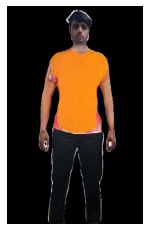

In [50]:
# display 2D result

img_path = './results/aligned/TFM/test_pairs/tryon/person@1=person_whole_front.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.axis('off')
plt.show()